<font face='monospace'>Code to draw Lightning using mathematical functions</font>

In [1]:
import math
import numpy as np
from numba import jit
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = 'monospace'
plt.rcParams["font.style"] = 'normal'
plt.rcParams["font.weight"] = 'bold'

In [2]:
# Define E function
@jit
def E(x, y, k):
    term1 = -x + 0.3 * y ** 2
    term2 = 0.1 * (k + 1) * (y - 1) * (0.5 - (1 / math.pi) * math.atan(20 * (y - (0.6 - 0.5 * (-1) ** k) * (0.02 * k ** 2))))
    term3 = 0.05 * (0.5 + 4 * (-1) ** k) * math.atan(5 * y + 3.5)
    term4 = 0.03 * math.cos(10 * y + (3.5 + 3.5 * (-1) ** k) * x)
    term5 = 0.02 * math.cos((30 + 5 * k * (0.5 - (1 / math.pi) * math.atan(10 * y))) * y + 10 * x)
    term6 = 0.01 * math.cos(50 * y + 4 * x)
    term7 = 0.004 * math.cos(200 * y + 40 * x)
    term8 = 0.0015 * math.cos(600 * y)
    return term1 + term2 + term3 + term4 + term5 + term6 + term7 + term8

# Combined function
@jit
def f(x, y):
    term1 = -0.99
    term2 = -1 * (0.6 * x + 0.2) ** 100
    term3 = -1 * (0.8 * y) ** 100

    term4 = 0
    cap = 800  # Set the cap value for exponentiation
    for k in range(1, 10):
        val = max(min((-5000 * E(x, y, k) ** 2), 800), -800)
        exp_value = math.exp(val)
        term4 += 2 * exp_value

    return term1 + term2 + term3 + term4

In [3]:
f(2, 3)  # run once so that the code gets compiled

-1.0498425511251932e+38

In [4]:
# Generate x and y values for sampling
x_vals = np.linspace(-5, 5, 5000)
y_vals = np.linspace(-5, 5, 5000)

# Collect points where full_equation > 0
points = []
for x in x_vals:
    for y in y_vals:
        try:
            if f(x, y) > 0:  # this condition is very important
                points.append((x, y))
        except OverflowError:
            pass  # Skip values that cause overflow

# Separate x and y coordinates for plotting
x_points, y_points = zip(*points)

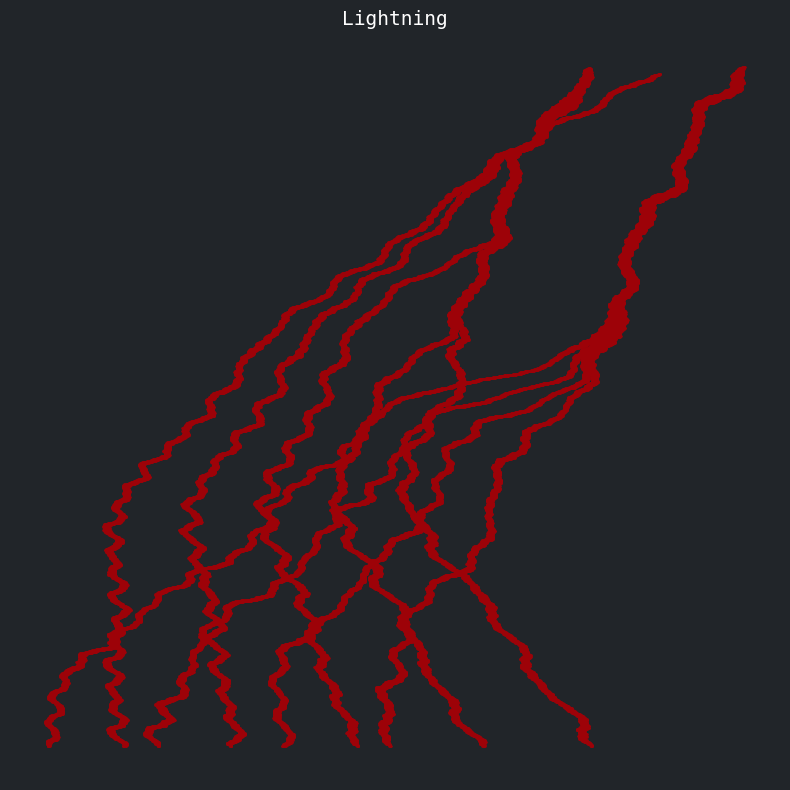

In [5]:
# Plot settings
plt.figure(figsize=(8, 8), facecolor='#212529')  # black variant
plt.scatter(x_points, y_points, s=0.9, color='#9d0208', marker="8")  # Red variant

# Add title with specified font
plt.title("Lightning", color='white', fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()